<a href="https://colab.research.google.com/github/dantrainor9/Breast_Cancer_Diagnostics/blob/main/Breast_Cancer_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [2]:
path = '/content/drive/MyDrive/Breast cancer diagnostics/WBCdiag_02_withheader.csv'
df = pd.read_csv(path)

#**Beginning of EDA**

In [3]:
#beginning data exploration
df.head()

,MALIG,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
0,-1,5,1,1,1,2,1,3,1,1
1,-1,5,4,4,5,7,10,3,2,1
2,-1,3,1,1,1,2,2,3,1,1
3,-1,6,8,8,1,3,4,3,7,1
4,-1,4,1,1,3,2,1,3,1,1


In [4]:
df.shape

(683, 10)

In [5]:
df.describe()

,MALIG,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,-0.300146,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.954592,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,-1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   MALIG               683 non-null    int64
 1   Clump_Thick         683 non-null    int64
 2   Uniform_Cell_Size   683 non-null    int64
 3   Uniform_Cell_Shape  683 non-null    int64
 4   Marginal_Adhes      683 non-null    int64
 5   Epit_Size           683 non-null    int64
 6   Bare_Nuclei         683 non-null    int64
 7   Bland_Chrom         683 non-null    int64
 8   Norm_Nucleoli       683 non-null    int64
 9   Mitoses             683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [7]:
df['MALIG'].value_counts()

MALIG
-1    444
 1    239
Name: count, dtype: int64

In [8]:
#reassigning all -1 values which indicate benign growths as 0
df['MALIG'] = np.where(df['MALIG']<0,0,df['MALIG'])

In [9]:
#while this dataset is small, the target column has good representation of the positive class.

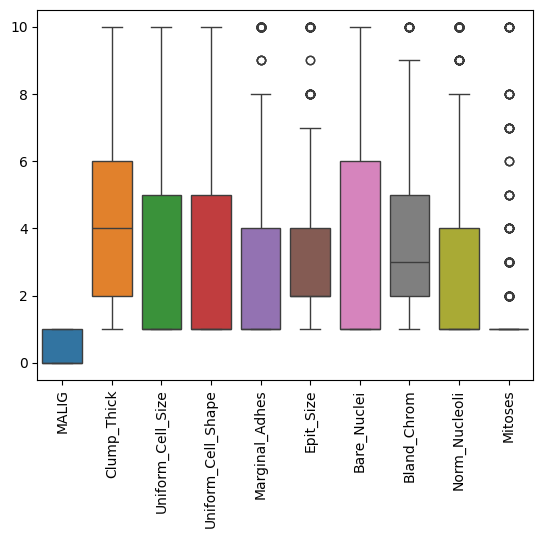

In [10]:
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [11]:
#some outliers, but these may still be indicators of malignancy
#also not a lot of variance in some of the feature columns, 6/9 have their mininmum, 25%, and 50% at 1

In [12]:
df.duplicated().value_counts()

False    449
True     234
Name: count, dtype: int64

In [13]:
#lots of individuals with the same data. Interesting how close this is to the target column class split

In [14]:
corr=df.corr()

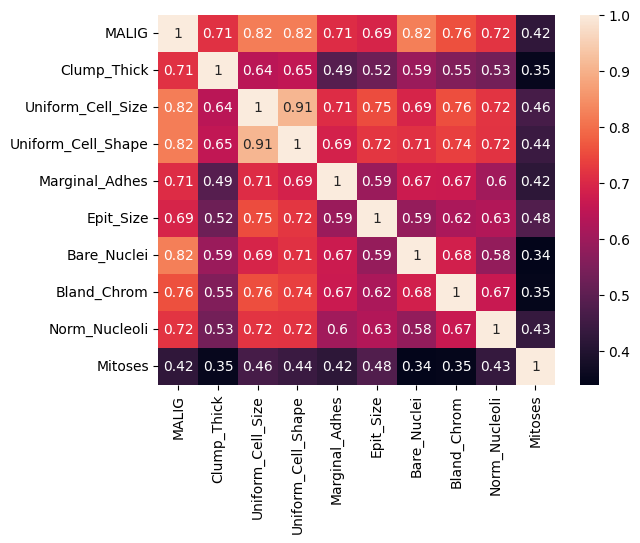

In [15]:
sns.heatmap(data=corr,annot=True);

In [16]:
#interesting that cell shape and size have both a very high correlation to each other and to malignancy

In [57]:
corr2 = df.corr(method='spearman')

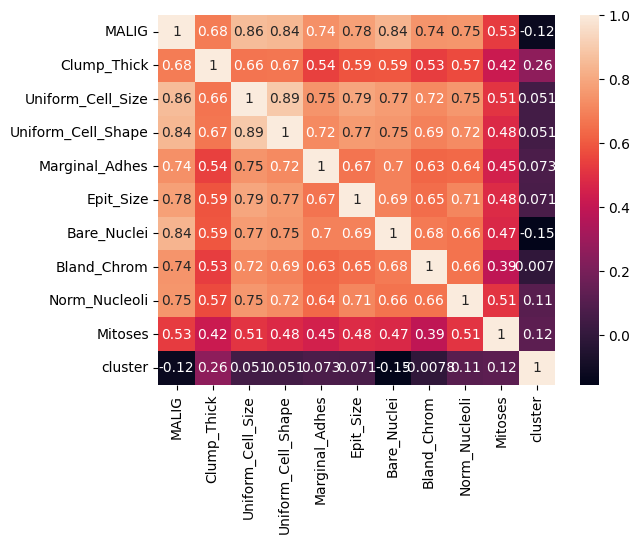

In [58]:
sns.heatmap(data=corr2,annot=True);

In [ ]:
#based on the boxplots above, I doubt this data is strictly parametric, so I'll rely on the results from Spearman's correlation

#**Beginning of Clustering Analysis**

In [17]:
#scaling data for clustering algorithm
scaler = StandardScaler()

In [18]:
df_scaled = scaler.fit_transform(df)

In [19]:
#creating a clustering algorithm
kmeans = KMeans(n_clusters=3, max_iter=500)

In [20]:
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=3)

In [21]:
#visualizing clusters in scatterplots
df['cluster'] = kmeans.labels_

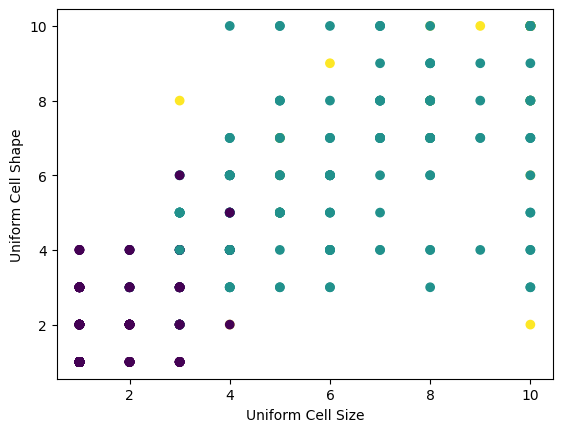

In [22]:
plt.scatter(df['Uniform_Cell_Size'],df['Uniform_Cell_Shape'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Uniform Cell Shape');

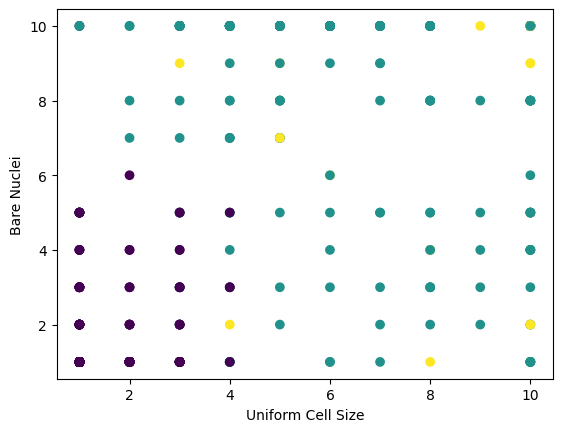

In [23]:
plt.scatter(df['Uniform_Cell_Size'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Bare Nuclei');

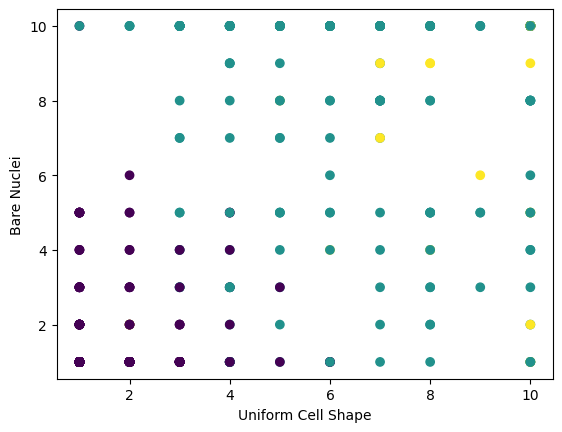

In [24]:
plt.scatter(df['Uniform_Cell_Shape'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Shape')
plt.ylabel('Bare Nuclei');

In [25]:
#making a function to determine ideal # of clusters
ks = range(2,20)
sil = []
inertias = []

for k in ks:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sil.append(silhouette_score(df, km.labels_))
  inertias.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

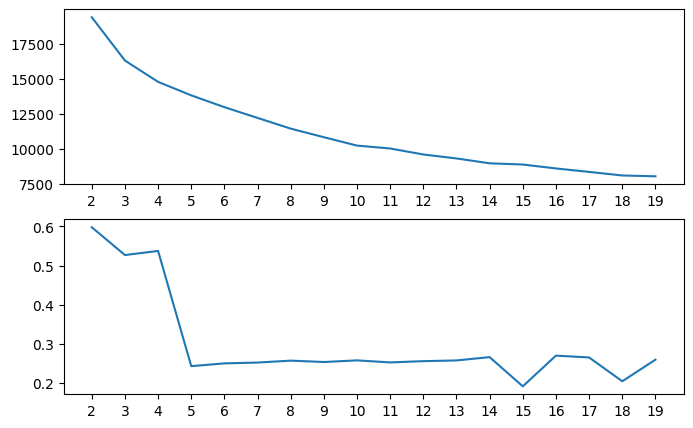

In [26]:
fig, axes = plt.subplots(2,1, figsize=(8,5))
axes[0].plot(ks, inertias)
axes[1].plot(ks, sil)
axes[0].set_xticks(ks)
axes[1].set_xticks(ks);
#looks like 6 clusters is a good number

In [27]:
#reclustering with ideal number of clusters
kmeans = KMeans(n_clusters=6, max_iter=500)

In [28]:
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=6)

In [29]:
df['cluster'] = kmeans.labels_

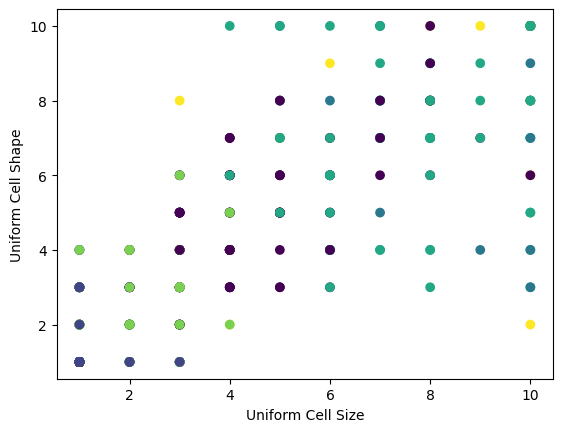

In [30]:
plt.scatter(df['Uniform_Cell_Size'],df['Uniform_Cell_Shape'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Uniform Cell Shape');

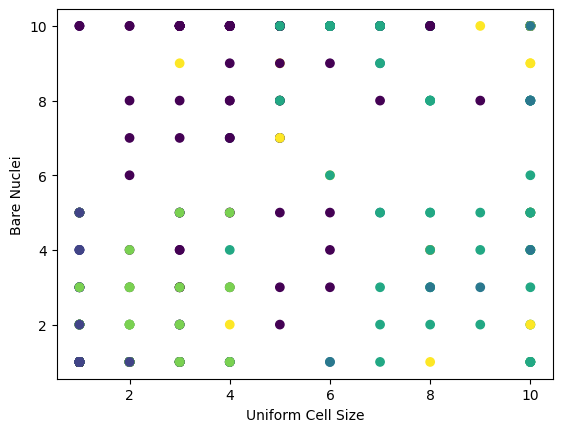

In [31]:
plt.scatter(df['Uniform_Cell_Size'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Bare Nuclei');

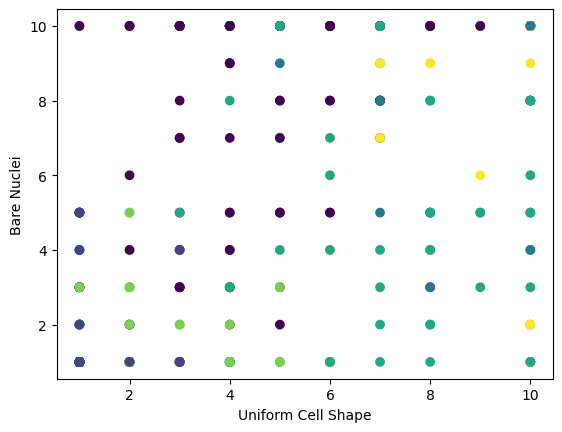

In [32]:
plt.scatter(df['Uniform_Cell_Shape'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Shape')
plt.ylabel('Bare Nuclei');

In [33]:
#scatterplots were not revealing so let's try a groupby and some other data viz to see if we can identify trends in clusters

In [34]:
clusters = df.groupby(['cluster']).mean().reset_index()

In [35]:
clusters.value_counts()

cluster  MALIG     Clump_Thick  Uniform_Cell_Size  Uniform_Cell_Shape  Marginal_Adhes  Epit_Size  Bare_Nuclei  Bland_Chrom  Norm_Nucleoli  Mitoses 
0        0.928571  7.020408     4.326531           4.755102            4.193878        3.693878   7.959184     4.714286     3.632653       1.632653    1
1        0.000000  1.781609     1.111111           1.180077            1.141762        1.977011   1.256705     2.007663     1.065134       1.076628    1
2        1.000000  7.275000     8.650000           8.150000            7.000000        8.250000   8.400000     6.375000     4.550000       2.075000    1
3        1.000000  7.078947     7.644737           7.289474            5.842105        5.078947   6.855263     7.000000     8.539474       1.657895    1
4        0.005650  4.604520     1.423729           1.604520            1.564972        2.192090   1.259887     2.107345     1.423729       1.033898    1
5        1.000000  7.645161     8.354839           8.322581            7.193548        

In [36]:
#groupby looks promising

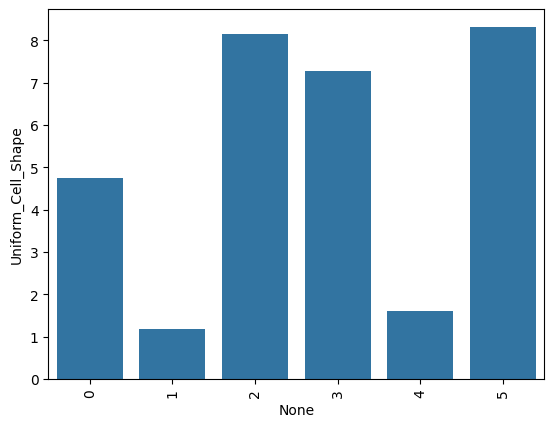

In [37]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Uniform_Cell_Shape'])
plt.xticks(rotation=90);

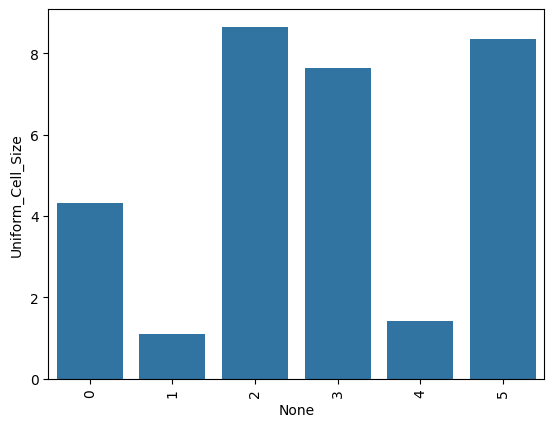

In [38]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Uniform_Cell_Size'])
plt.xticks(rotation=90);

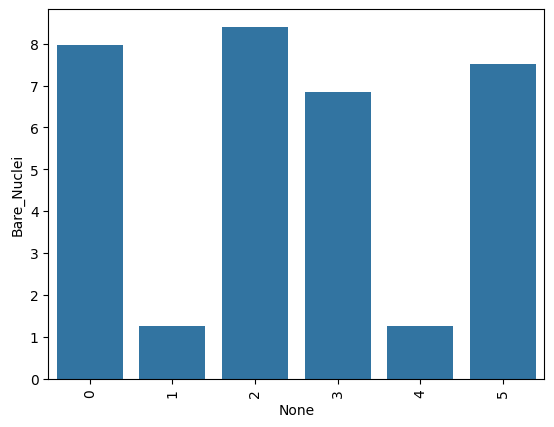

In [39]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Bare_Nuclei'])
plt.xticks(rotation=90);

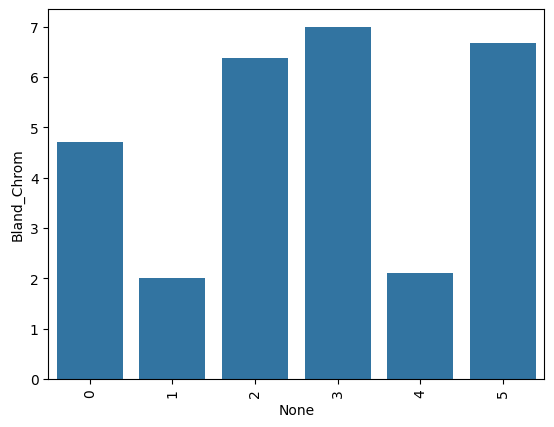

In [40]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Bland_Chrom'])
plt.xticks(rotation=90);

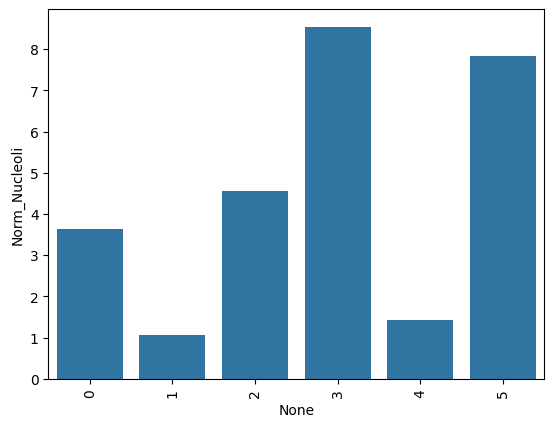

In [41]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Norm_Nucleoli'])
plt.xticks(rotation=90);

In [42]:
#trends area little clearer when visualizing a groupby in bar graphs

#**Beginning of Classification Modeling**

In [43]:
#separating out target column
X = df[['Clump_Thick',
      'Uniform_Cell_Size',
      'Uniform_Cell_Shape',
      'Marginal_Adhes',
      'Epit_Size',
      'Bare_Nuclei',
      'Bland_Chrom',
      'Norm_Nucleoli',
      'Mitoses']]
y = df['MALIG']

In [44]:
#splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
#exploring train dataframe
X_train.shape

(512, 9)

In [46]:
X_train.describe()

,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,4.408203,3.123047,3.234375,2.800781,3.212891,3.500000,3.341797,2.769531,1.564453
std,2.784387,3.068446,3.054583,2.830391,2.200247,3.630702,2.363778,2.957231,1.637305
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.250000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [50]:
rf = RandomForestClassifier()

In [52]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
rf_preds = rf.predict(X_test)

In [54]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       103
           1       0.98      0.93      0.95        68

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [ ]:
#very high f score without scaling. I'll try a boosted model as well

In [1]:
#commented out to try later if needed.
#scaler=StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)